# Research Question 1: Trends of UFO sightings over the years. Were there specific years that experienced a significant increase in sightings? Trends of UFO sightings across countries.

In [3]:
# Extracting the dataset from Kaggle
import pandas as pd
import matplotlib.pyplot as plt
import requests
from config import api_key

# Define the dataset path
dataset = 'NUFORC/ufo-sightings'
url = f'https://www.kaggle.com/api/v1/datasets/download/{dataset}'

# Set headers for authentication
headers = {
    'Authorization': f'Bearer {api_key}'
}

# Send a GET request to download the dataset
response = requests.get(url, headers=headers, stream=True)

# Check if the request was successful
if response.status_code == 200:
    # Save the dataset to a zip file
    with open('ufo_sightings.zip', 'wb') as file:
        for chunk in response.iter_content(chunk_size=1024):
            file.write(chunk)
    print('Dataset downloaded successfully.')
else:
    print(f'Failed to download dataset: {response.status_code}, {response.text}')
# Unzip the downloaded file
import zipfile

with zipfile.ZipFile('ufo_sightings.zip', 'r') as zip_ref:
    zip_ref.extractall('ufo_sightings')

print('Dataset extracted to ufo_sightings directory.')

Dataset downloaded successfully.
Dataset extracted to ufo_sightings directory.


In [5]:
# Cleaning columns 5 & 9, converting the dtype to str
dtype = {
    5: str,  
    9: str  
}
df = pd.read_csv("ufo_sightings/scrubbed.csv", dtype=dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [7]:
# Converting columns country and state to uppercase & adding 3 new columns for date, time, year
df['country'] = df['country'].str.upper()
df['state'] = df['state'].str.upper()
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time
df['year'] = df['datetime'].dt.year
df['hour'] = df['datetime'].dt.hour

In [9]:
#dropping rows with NaN
df.dropna(inplace=True)

In [11]:
df.head()

datetime        city state country     shape duration (seconds)  \
0 1949-10-10 20:30:00  san marcos    TX      US  cylinder               2700   
3 1956-10-10 21:00:00        edna    TX      US    circle                 20   
4 1960-10-10 20:00:00     kaneohe    HI      US     light                900   
5 1961-10-10 19:00:00     bristol    TN      US    sphere                300   
7 1965-10-10 23:45:00     norwalk    CT      US      disk               1200   

  duration (hours/min)                                           comments  \
0           45 minutes  This event took place in early fall around 194...   
3             1/2 hour  My older brother and twin sister were leaving ...   
4           15 minutes  AS a Marine 1st Lt. flying an FJ4B fighter/att...   
5            5 minutes  My father is now 89 my brother 52 the girl wit...   
7           20 minutes  A bright orange color changing to reddish colo...   

  date posted    latitude  longitude         date      time    year  hour  
0   4/27/2004  29.8830556  -97.941111  1949-10-10  20:30:00  1949.0  20.0  
3   1/17/2004  28.9783333  -96.645833  1956-10-10  21:00:00  1956.0  21.0  
4   1/22/2004  21.4180556 -157.803611  1960-10-10  20:00:00  1960.0  20.0  
5   4/27/2007  36.5950000  -82.188889  1961-10-10  19:00:00  1961.0  19.0  
7   10/2/1999  41.1175000  -73.408333  1965-10-10  23:45:00  1965.0  23.0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66040 entries, 0 to 80331
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              66040 non-null  datetime64[ns]
 1   city                  66040 non-null  object        
 2   state                 66040 non-null  object        
 3   country               66040 non-null  object        
 4   shape                 66040 non-null  object        
 5   duration (seconds)    66040 non-null  object        
 6   duration (hours/min)  66040 non-null  object        
 7   comments              66040 non-null  object        
 8   date posted           66040 non-null  object        
 9   latitude              66040 non-null  object        
 10  longitude             66040 non-null  float64       
 11  date                  66040 non-null  object        
 12  time                  66040 non-null  object        
 13  year                 

In [15]:
#Adding a column for duration in mins
df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'], errors='coerce')
df['duration (mins)'] = df['duration (seconds)']/60
df.head()

datetime        city state country     shape  duration (seconds)  \
0 1949-10-10 20:30:00  san marcos    TX      US  cylinder              2700.0   
3 1956-10-10 21:00:00        edna    TX      US    circle                20.0   
4 1960-10-10 20:00:00     kaneohe    HI      US     light               900.0   
5 1961-10-10 19:00:00     bristol    TN      US    sphere               300.0   
7 1965-10-10 23:45:00     norwalk    CT      US      disk              1200.0   

  duration (hours/min)                                           comments  \
0           45 minutes  This event took place in early fall around 194...   
3             1/2 hour  My older brother and twin sister were leaving ...   
4           15 minutes  AS a Marine 1st Lt. flying an FJ4B fighter/att...   
5            5 minutes  My father is now 89 my brother 52 the girl wit...   
7           20 minutes  A bright orange color changing to reddish colo...   

  date posted    latitude  longitude         date      time    year  hour  \
0   4/27/2004  29.8830556  -97.941111  1949-10-10  20:30:00  1949.0  20.0   
3   1/17/2004  28.9783333  -96.645833  1956-10-10  21:00:00  1956.0  21.0   
4   1/22/2004  21.4180556 -157.803611  1960-10-10  20:00:00  1960.0  20.0   
5   4/27/2007  36.5950000  -82.188889  1961-10-10  19:00:00  1961.0  19.0   
7   10/2/1999  41.1175000  -73.408333  1965-10-10  23:45:00  1965.0  23.0   

   duration (mins)  
0        45.000000  
3         0.333333  
4        15.000000  
5         5.000000  
7        20.000000

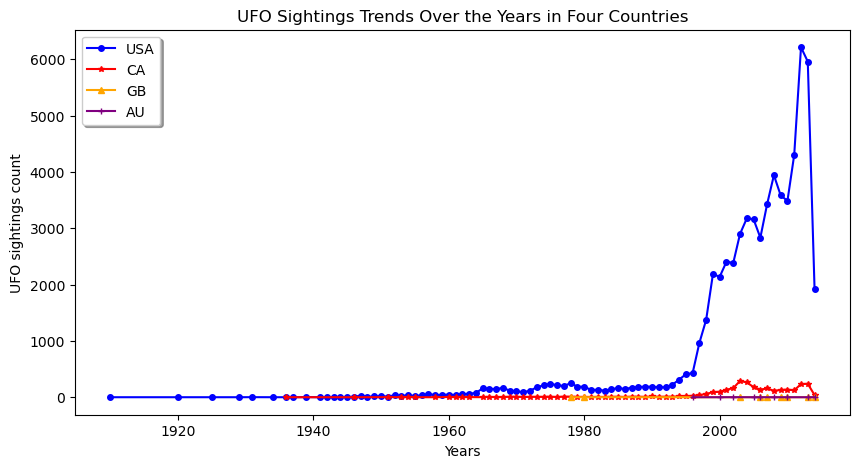

In [17]:
df_country = df.groupby('country')['year'].value_counts()
df_country = df_country.reset_index()
df_country_AU = df_country[df_country['country'] == 'AU']
df_country_US = df_country[df_country['country'] == 'US']
df_country_GB = df_country[df_country['country'] == 'GB']
df_country_CA = df_country[df_country['country'] == 'CA']
plt.figure(figsize=(10,5))
df_country_US = df_country_US.sort_values('year')
plt.plot(df_country_US['year'],df_country_US['count'], color='blue', marker='o', markersize=4, label='USA')
df_country_CA = df_country_CA.sort_values('year')
plt.plot(df_country_CA['year'],df_country_CA['count'], color='red', marker='*', markersize=4, label='CA')
df_country_GB = df_country_GB.sort_values('year')
plt.plot(df_country_GB['year'],df_country_GB['count'], color='orange',marker='^', markersize=4, label='GB')
df_country_AU = df_country_AU.sort_values('year')
plt.plot(df_country_AU['year'],df_country_AU['count'], color='purple', marker='+', markersize=4, label='AU')
plt.legend(shadow=True)
plt.title('UFO Sightings Trends Over the Years in Four Countries')
plt.xlabel('Years')
plt.ylabel('UFO sightings count')
plt.show()

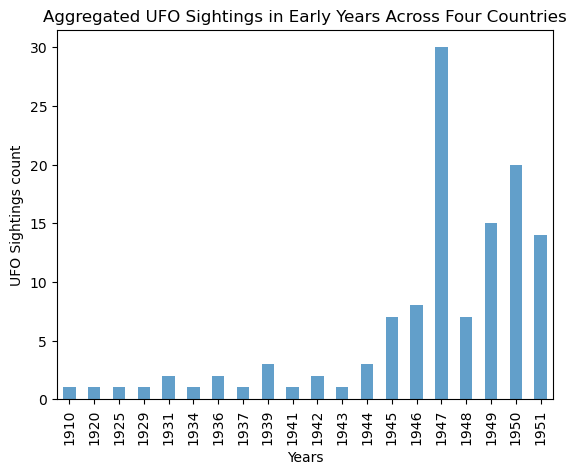

In [19]:
# Compare the trend of UFO sightings over the years
df['datetime'].dt.year.value_counts().sort_index().head(20).plot(kind='bar', alpha=0.7)
plt.xlabel('Years')
plt.ylabel('UFO Sightings count')
plt.title('Aggregated UFO Sightings in Early Years Across Four Countries')
plt.show()

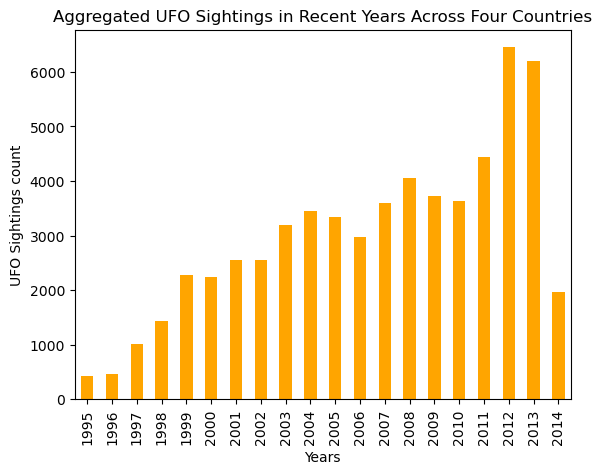

In [21]:
df['datetime'].dt.year.value_counts().sort_index().tail(20).plot(kind='bar', color='orange')
plt.xlabel('Years')
plt.ylabel('UFO Sightings count')
plt.title('Aggregated UFO Sightings in Recent Years Across Four Countries')
plt.show()

In [23]:
df.groupby(['country', 'year']).size()
country_year_counts = df.groupby(['country', 'year']).size().reset_index(name='counts')
country_year_counts

country    year  counts
0        AU  1996.0       1
1        AU  2000.0       1
2        AU  2002.0       2
3        AU  2005.0       1
4        AU  2006.0       1
..      ...     ...     ...
157      US  2010.0    3488
158      US  2011.0    4306
159      US  2012.0    6216
160      US  2013.0    5961
161      US  2014.0    1927

[162 rows x 3 columns]

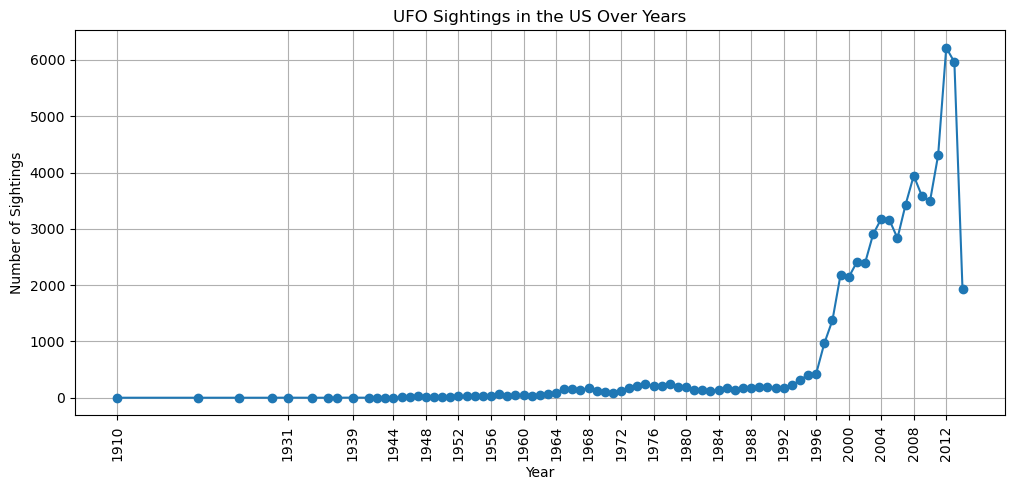

In [25]:
#Number of UFO sightings in the US over the years
us_data = country_year_counts[country_year_counts['country'] == 'US']

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(us_data['year'], us_data['counts'], marker='o')
plt.title('UFO Sightings in the US Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.xticks(us_data['year'][::4], rotation=90)

plt.grid()
plt.show()

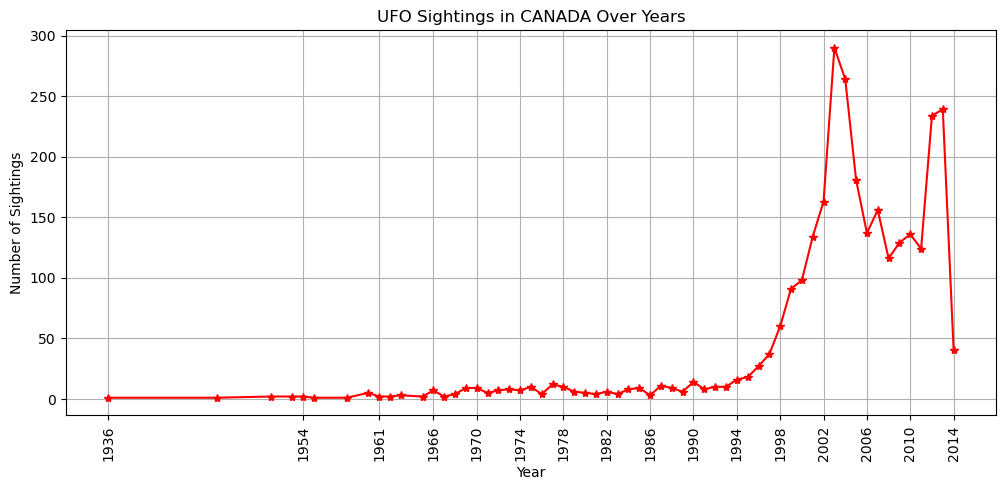

In [27]:
#CANADA
ca_data = country_year_counts[country_year_counts['country'] == 'CA']

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(ca_data['year'], ca_data['counts'], marker='*',color='red')
plt.title('UFO Sightings in CANADA Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.xticks(ca_data['year'][::4], rotation=90)
plt.grid()
plt.show()

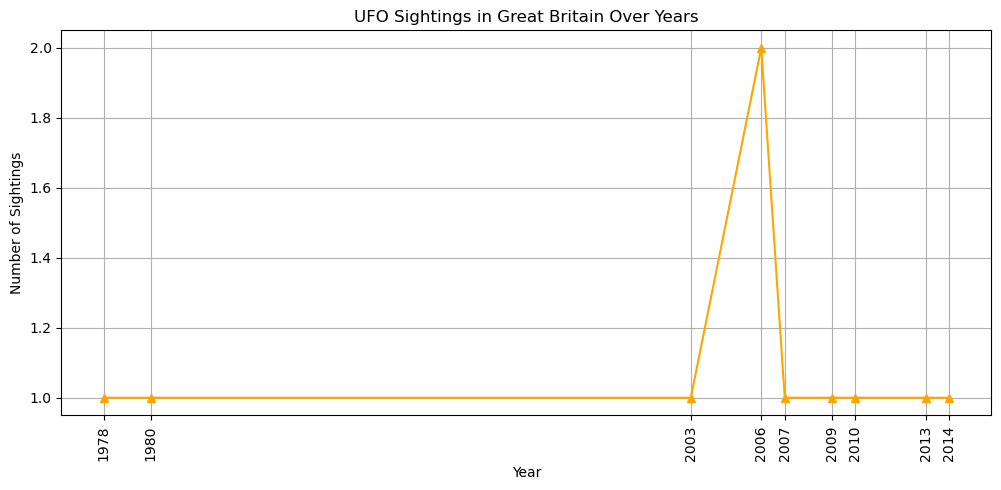

In [29]:
#Great Britain
gb_data = country_year_counts[country_year_counts['country'] == 'GB']

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(gb_data['year'], gb_data['counts'], marker='^', color='orange')
plt.title('UFO Sightings in Great Britain Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.xticks(gb_data['year'], rotation=90)
plt.grid()
plt.show()

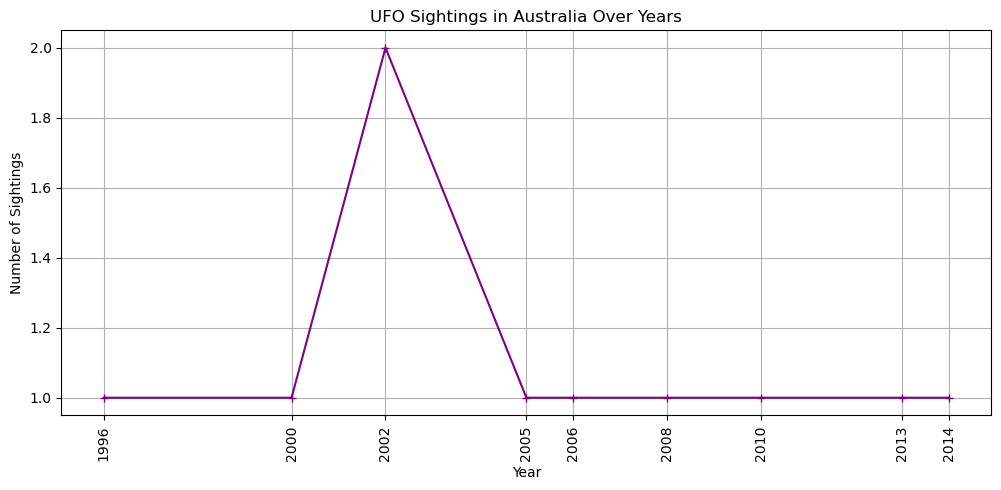

In [31]:
#Australia
au_data = country_year_counts[country_year_counts['country'] == 'AU']

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(au_data['year'], au_data['counts'], marker='+',color='purple')
plt.title('UFO Sightings in Australia Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.xticks(au_data['year'], rotation=90)
plt.grid()
plt.show()

In [33]:
country = country_year_counts.groupby('country')['year'].sum().sort_values(ascending=False)
country

country
US    163696.0
CA    120974.0
AU     18054.0
GB     18020.0
Name: year, dtype: float64

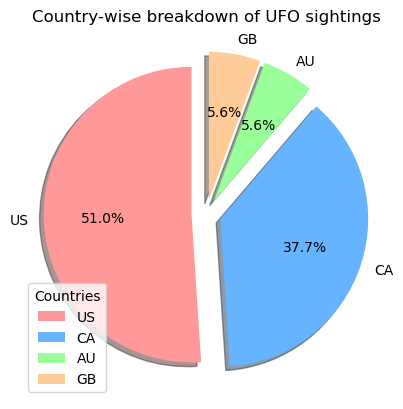

In [35]:
explode = [0.1] * len(country)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(country, labels=country.index, autopct="%1.1f%%", explode=explode,shadow=True, colors=colors, startangle=90)
plt.legend(country.index, title="Countries", loc="lower left")
plt.title('Country-wise breakdown of UFO sightings')
plt.show()

In [37]:
# Performing linear regression for sightings in the US
from scipy.stats import linregress
us_data

country    year  counts
79       US  1910.0       1
80       US  1920.0       1
81       US  1925.0       1
82       US  1929.0       1
83       US  1931.0       2
..      ...     ...     ...
157      US  2010.0    3488
158      US  2011.0    4306
159      US  2012.0    6216
160      US  2013.0    5961
161      US  2014.0    1927

[83 rows x 3 columns]

The r-squared is: 0.47089345433191243, pvalue is : 8.085289290550622e-13


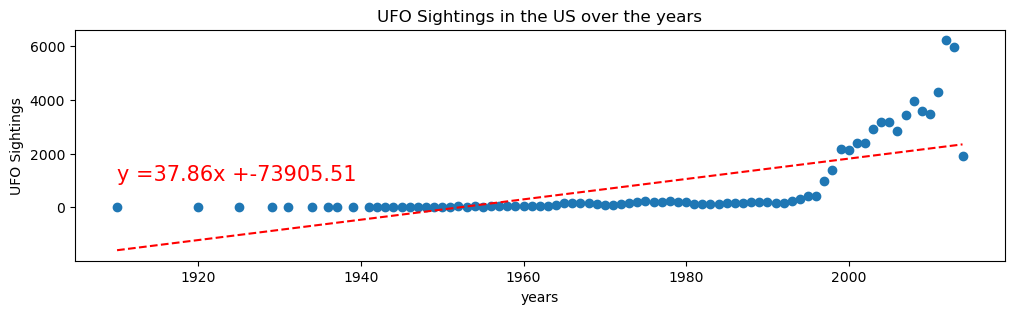

In [38]:
plt.figure(figsize=(12,3))
x_values = us_data['year']
y_values = us_data['counts']

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq= "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r--')
plt.annotate(line_eq, (1910,1000), fontsize=15, color='red')

plt.xlabel('years')
plt.ylabel('UFO Sightings')

print(f"The r-squared is: {rvalue**2}, pvalue is : {pvalue}")
plt.title('UFO Sightings in the US over the years')
plt.show()

**SUMMARY**

**R-Squared Value:**
- This value indicates that 47.09% of the variability in UFO sightings can be explained by the year variable in our model
- Since the value of r^2 is not a perfect 1, we can say that value of 0.47 suggests a moderate correlation between year and UFO sightings

**pvalue:**
- The p-value is much lesser than 0.05.
- This suggests strong evidence against null hypothesis.
- We can infer that the relationship between year and UFO sightings is significant.

**Linear Regression Equation:**
- The positive slope indicates that the UFO sightings have increased over the years
- This could suggest that there is a growing interest among public on this topic, better reporting options for public in recent years, or actual increase in the UFO sightings
- The presence of scatter points around the line plot indicate that many factors can impact the outcomes which are not included in our dataset.
  


# Research Question 2: How do UFO sightings vary by country, highlighting the top country and its states with the most reports. Did any state/states report high number of UFO sightings compared to others? Additionally, how do sightings of different UFO shapes compare across these states? Are there specific states that report significantly higher counts of UFO sightings for a particular shapes?

In [43]:
# Import the required libraries
import hvplot.pandas
import pandas as pd

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

#map showing records of sightings from 4 countries:
df['latitude'] = df['latitude'].astype(float)
df['longitude '] = df['longitude '].astype(float)
# Configure the map plot_1
map_plot_1 = df.hvplot.points(
    "longitude ",
    "latitude",
    geo=True,
    tiles="OSM",
    size=5,  # Adjust the point size as needed
    color='city',  # color points by city
    alpha=0.7, #set transparency for better visibility
    width=1500,
    height=1500
)

# Display the map plot_1
map_plot_1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude ,latitude]   (city)

In [45]:
#Trends of UFO sightings by states in the US. Did any state/states report high number of UFO sightings compared to others?
us_filtered_df = df[df['country'] == 'US']
US_Statewise_SightingsCount = us_filtered_df.groupby('country')['state'].value_counts() 
us_filtered_state = US_Statewise_SightingsCount.loc['US']
us_filtered_state

state
CA    8620
FL    3732
WA    3686
TX    3367
NY    2894
IL    2431
AZ    2348
PA    2308
OH    2229
MI    1772
NC    1711
OR    1652
MO    1422
CO    1378
IN    1265
VA    1238
GA    1228
NJ    1225
MA    1224
WI    1194
TN    1089
MN     989
SC     979
CT     857
KY     833
MD     814
NV     773
OK     708
NM     686
IA     664
AL     625
UT     608
KS     595
AR     569
ME     541
LA     540
ID     506
NH     482
MT     456
WV     436
NE     371
MS     363
AK     303
HI     253
VT     253
RI     222
SD     174
WY     167
DE     165
ND     123
PR      24
DC       7
Name: count, dtype: int64

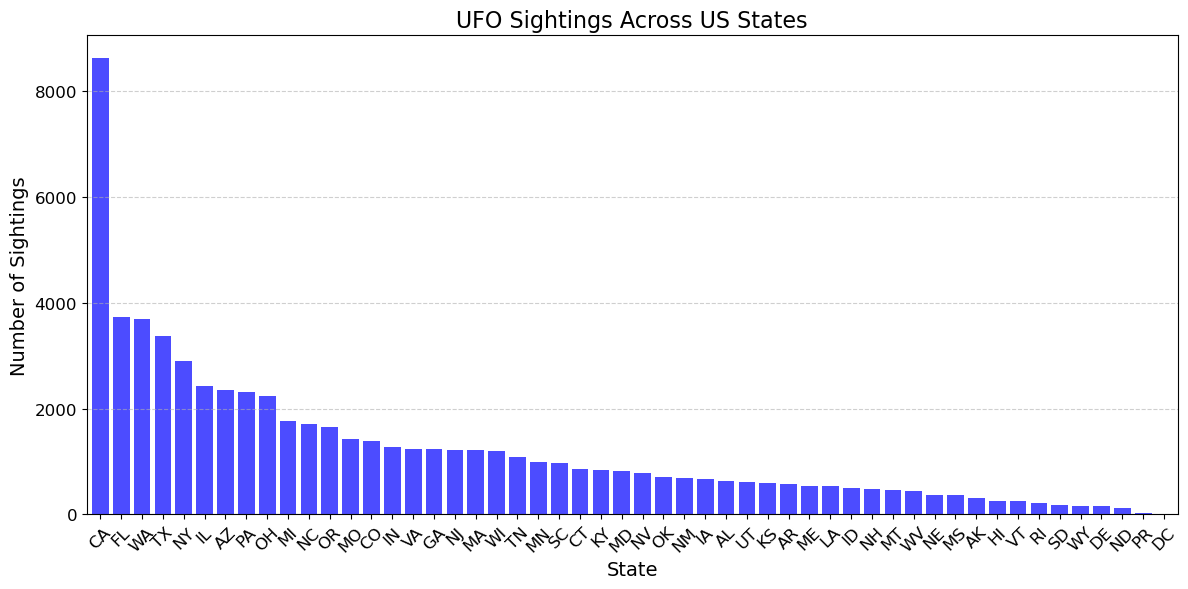

In [47]:
ax = us_filtered_state.plot(
    kind='bar',
    color='blue',               
    figsize=(12, 6),            
    width=0.8,                  
    legend=False,               
    alpha=0.7                 
)

# Customizing the plot
ax.set_title('UFO Sightings Across US States', fontsize=16)  
ax.set_xlabel('State', fontsize=14)                          
ax.set_ylabel('Number of Sightings', fontsize=14)           
ax.tick_params(axis='x', rotation=45, labelsize=12)       
ax.tick_params(axis='y', labelsize=12)                     
ax.grid(axis='y', linestyle='--', alpha=0.6)              

# Adjust layout
plt.tight_layout()  # Ensures proper spacing
plt.show()         # Display the plot

In [49]:
#Exploring California, the U.S. state with the highest number of UFO sightings
shape_df_info = df[df['country'] == 'US'][['state','shape']]
shape_df_info = shape_df_info.reset_index(drop=True)
shape_info_CA = shape_df_info[shape_df_info['state'] == 'CA'].copy()
shape_counts = shape_info_CA ['shape'].value_counts()
shape_counts

shape
light        1819
circle        835
triangle      818
fireball      695
disk          625
sphere        610
other         608
unknown       562
oval          382
formation     293
changing      266
cigar         195
chevron       150
rectangle     149
flash         142
diamond       135
cylinder      119
egg            85
teardrop       71
cross          31
cone           28
flare           1
round           1
Name: count, dtype: int64

In [51]:
shape_list = shape_info_CA['shape'].unique()
len(shape_list)

23

In [120]:
import numpy as np
from matplotlib.patches import Patch
colors_mapping={}
for n in range(len(shape_list)):
    colors_mapping[shape_list[n]] = np.random.rand(3,)

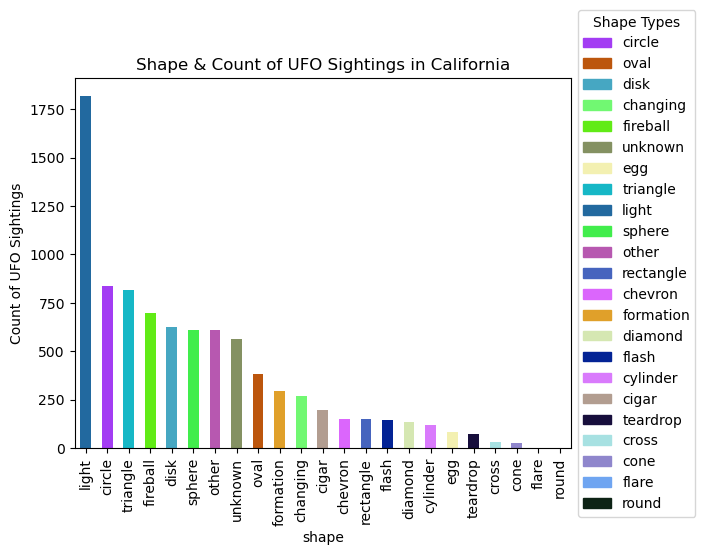

In [55]:
colors = [colors_mapping[shape] for shape in shape_list]
ax = shape_counts.plot(kind='bar', ylabel='Count of UFO Sightings', color=[colors_mapping.get(shape, 'gray') for shape in shape_counts.index])
# Create custom legend handles
legend_handles = [Patch(color=colors_mapping[shape], label=shape) for shape in colors_mapping.keys()]
# Add the legend to the plot
ax.legend(handles=legend_handles, title='Shape Types',loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Shape & Count of UFO Sightings in California')
plt.show()

In [57]:
US_CA_year_df= us_filtered_df[us_filtered_df['state'] == 'CA']['year'].value_counts()
US_CA_year_df.sort_index(inplace=True)

US_CA_df = pd.DataFrame(US_CA_year_df)
US_CA_df

count
year         
1937.0      1
1944.0      1
1945.0      1
1946.0      2
1947.0      4
...       ...
2010.0    506
2011.0    528
2012.0    634
2013.0    614
2014.0    260

[72 rows x 1 columns]

<Figure size 1000x1000 with 0 Axes>

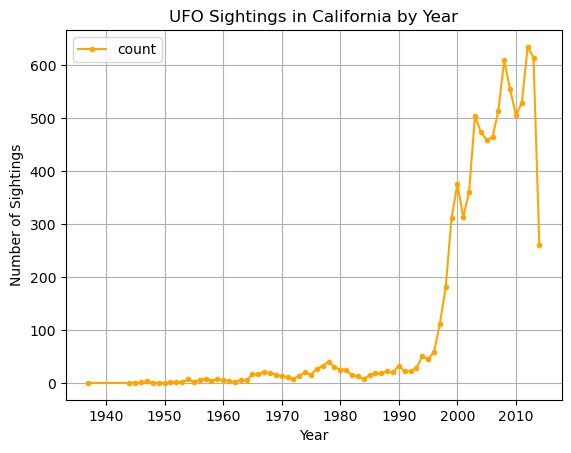

In [59]:
plt.figure(figsize=(10,10))
US_CA_df.plot(kind='line', y='count', title='UFO Sightings in California by Year', marker='o', markersize=3, color='orange')

# Add labels
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.grid(True)
plt.show()

In [61]:
shape_df_info 

state     shape
0        TX  cylinder
1        TX    circle
2        HI     light
3        TN    sphere
4        CT      disk
...     ...       ...
63094    TN     light
63095    ID    circle
63096    CA     other
63097    VA    circle
63098    OK     cigar

[63099 rows x 2 columns]

In [63]:
agg_data_shape = shape_df_info.groupby(['state', 'shape']).size().reset_index(name='count')
agg_data_shape

state      shape  count
0       AK   changing      5
1       AK      cigar      6
2       AK     circle     26
3       AK       cone      1
4       AK   cylinder      4
...    ...        ...    ...
1054    WY       oval      8
1055    WY  rectangle      2
1056    WY     sphere     13
1057    WY   triangle     14
1058    WY    unknown      9

[1059 rows x 3 columns]

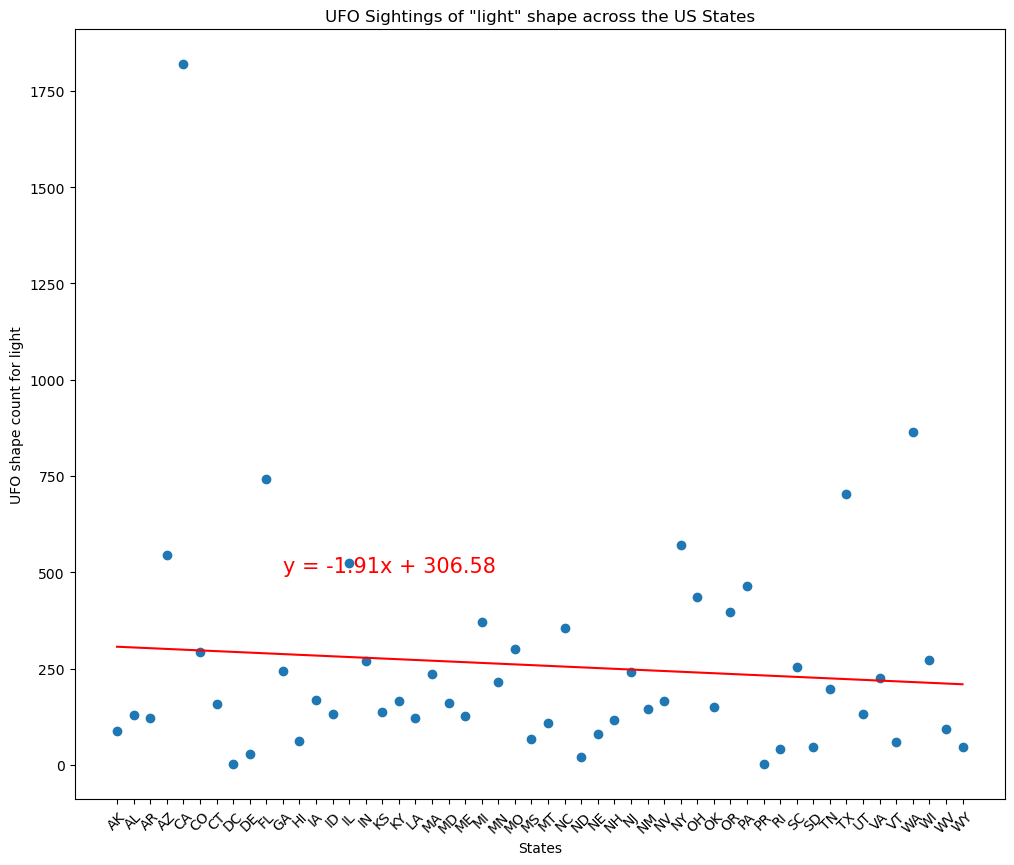

Slope: -1.911764705882353, Intercept: 306.5769230769231, R-squared: 0.00967581163808764, pvalue: 0.4878280265999114


In [65]:
# Filter for a specific shape
light_data = agg_data_shape[agg_data_shape['shape'] == 'light']

# Define the dependent and independent variables
y_val = light_data['count']
X_val = light_data['state'].astype('category').cat.codes  # Convert state to numerical codes

# Perform linear regression
#slope, intercept, r_value, p_value, std_err = linregress(X_val, y_val)
plt.figure(figsize=(12,10))
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_val, y_val)
regress_values = X_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(X_val,y_val)
plt.plot(X_val,regress_values,"r-")
plt.annotate(line_eq,(10,500),fontsize=15,color="red")
plt.xlabel('States')
plt.ylabel('UFO shape count for light')
plt.xticks(ticks=range(len(light_data['state'].unique())), labels=light_data['state'].unique(), rotation=45)
plt.title('UFO Sightings of "light" shape across the US States')
plt.show()

# Output the results
print(f'Slope: {slope}, Intercept: {intercept}, R-squared: {rvalue**2}, pvalue: {pvalue}')

**SUMMARY:**

**R-Squared Value:**
- The R squared value is 096047. This value indicates that96.47% of the variability in UFO sightings for shape "light" can be explained by the state codes
- This is a very low value, indicating a very poor relationship between state codes and the count of sightings of the "light" shape

**pvalue:**
- The p-value of 0.49 is much higher than 0.05.
- This suggests we fail to reject the Null hypothesis
- A p-value of 0.49 indicates that there is no statistically significant relationship between the state codes and the count of sightings for the shape "light"

**Linear Regression Equation:**
- The slight negative slope of the regression line (very close to zero slope), shows that there is no relationship between the state codes and the count of UFO sightings for the shape "light"
- This suggests that other factors, not captured by the state codes alone, likely influence the number of UFO sightings for the shape "light"

# Research Question 3: Trends in the UFO sighting duration in US. Is there any significant difference in duration on sightings reported during daytime Vs night time?- when were more sightings recorded-night or daytime? How does the time of day influence the frequency of reported UFO shape sightings?

In [69]:
df.head()

datetime        city state country     shape  duration (seconds)  \
0 1949-10-10 20:30:00  san marcos    TX      US  cylinder              2700.0   
3 1956-10-10 21:00:00        edna    TX      US    circle                20.0   
4 1960-10-10 20:00:00     kaneohe    HI      US     light               900.0   
5 1961-10-10 19:00:00     bristol    TN      US    sphere               300.0   
7 1965-10-10 23:45:00     norwalk    CT      US      disk              1200.0   

  duration (hours/min)                                           comments  \
0           45 minutes  This event took place in early fall around 194...   
3             1/2 hour  My older brother and twin sister were leaving ...   
4           15 minutes  AS a Marine 1st Lt. flying an FJ4B fighter/att...   
5            5 minutes  My father is now 89 my brother 52 the girl wit...   
7           20 minutes  A bright orange color changing to reddish colo...   

  date posted   latitude  longitude         date      time    year  hour  \
0   4/27/2004  29.883056  -97.941111  1949-10-10  20:30:00  1949.0  20.0   
3   1/17/2004  28.978333  -96.645833  1956-10-10  21:00:00  1956.0  21.0   
4   1/22/2004  21.418056 -157.803611  1960-10-10  20:00:00  1960.0  20.0   
5   4/27/2007  36.595000  -82.188889  1961-10-10  19:00:00  1961.0  19.0   
7   10/2/1999  41.117500  -73.408333  1965-10-10  23:45:00  1965.0  23.0   

   duration (mins)  
0        45.000000  
3         0.333333  
4        15.000000  
5         5.000000  
7        20.000000

In [71]:
df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'], errors='coerce')
df['duration (mins)'] = df['duration (seconds)']/60

In [73]:
# Define a function to classify time of day
def classify_time(datetime):
    if 6 <= datetime.hour < 18:  # 6 AM to 6 PM
        return 'Day'
    else:
        return 'Night'
df['time_of_day'] = df['datetime'].apply(classify_time)
df.head()

datetime        city state country     shape  duration (seconds)  \
0 1949-10-10 20:30:00  san marcos    TX      US  cylinder              2700.0   
3 1956-10-10 21:00:00        edna    TX      US    circle                20.0   
4 1960-10-10 20:00:00     kaneohe    HI      US     light               900.0   
5 1961-10-10 19:00:00     bristol    TN      US    sphere               300.0   
7 1965-10-10 23:45:00     norwalk    CT      US      disk              1200.0   

  duration (hours/min)                                           comments  \
0           45 minutes  This event took place in early fall around 194...   
3             1/2 hour  My older brother and twin sister were leaving ...   
4           15 minutes  AS a Marine 1st Lt. flying an FJ4B fighter/att...   
5            5 minutes  My father is now 89 my brother 52 the girl wit...   
7           20 minutes  A bright orange color changing to reddish colo...   

  date posted   latitude  longitude         date      time    year  hour  \
0   4/27/2004  29.883056  -97.941111  1949-10-10  20:30:00  1949.0  20.0   
3   1/17/2004  28.978333  -96.645833  1956-10-10  21:00:00  1956.0  21.0   
4   1/22/2004  21.418056 -157.803611  1960-10-10  20:00:00  1960.0  20.0   
5   4/27/2007  36.595000  -82.188889  1961-10-10  19:00:00  1961.0  19.0   
7   10/2/1999  41.117500  -73.408333  1965-10-10  23:45:00  1965.0  23.0   

   duration (mins) time_of_day  
0        45.000000       Night  
3         0.333333       Night  
4        15.000000       Night  
5         5.000000       Night  
7        20.000000       Night

In [75]:
US_df = df[df['country'] == 'US']

<Axes: title={'center': 'UFO sightings by month'}, xlabel='months', ylabel='UFO Sightings Count'>

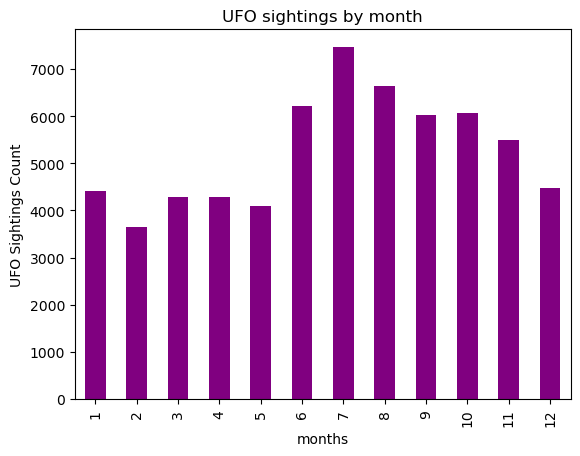

In [77]:
US_df['datetime'].dt.month.value_counts().sort_index().plot(kind='bar', xlabel='months', ylabel='UFO Sightings Count', title='UFO sightings by month', color='purple')

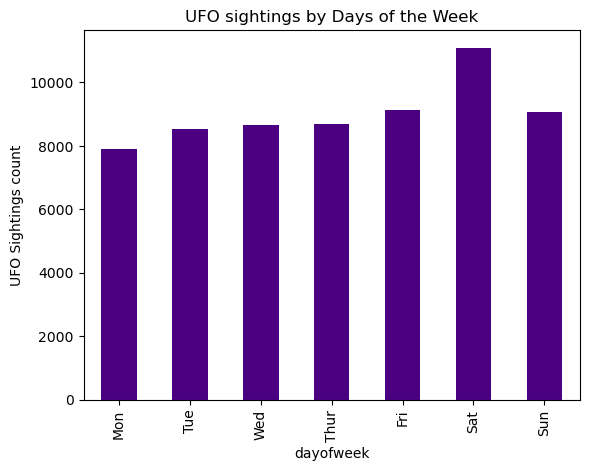

In [79]:
US_df['datetime'].dt.dayofweek.value_counts().sort_index().plot(kind='bar', xlabel='dayofweek', ylabel='UFO Sightings count', title='UFO sightings by Days of the Week', color='indigo')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
plt.show()

<Axes: title={'center': 'UFO sightings by Hour of the Day'}, xlabel='Hours', ylabel='UFO Sightings count'>

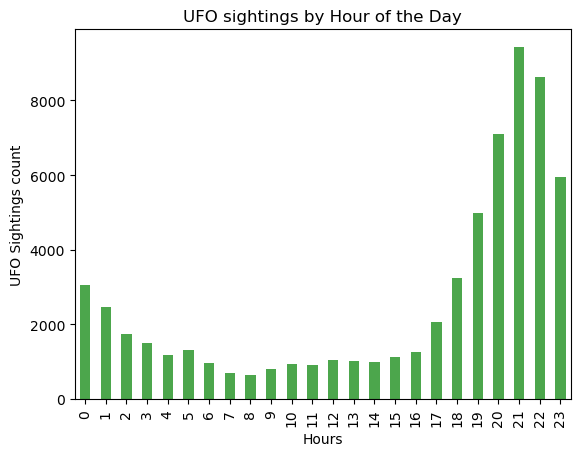

In [81]:
US_df['datetime'].dt.hour.value_counts().sort_index().plot(kind='bar', xlabel='Hours', ylabel='UFO Sightings count', title='UFO sightings by Hour of the Day', color='green', alpha=0.7)

In [83]:
US_df['time_of_day'].value_counts()

time_of_day
Night    50610
Day      12489
Name: count, dtype: int64

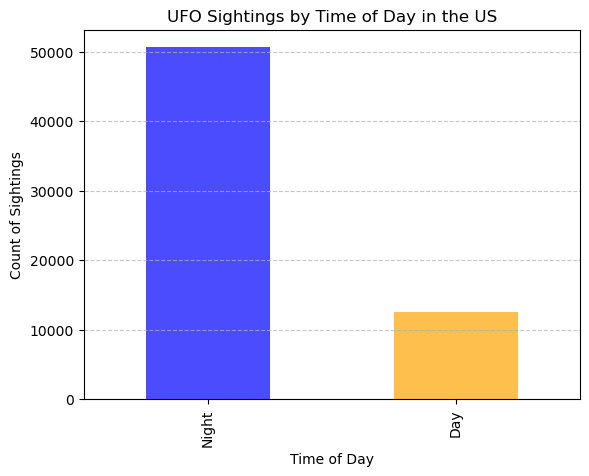

In [85]:
#Filtering country "US"
US_df = df[df['country'] == 'US']
US_df['time_of_day'].value_counts()
# Create a bar plot
US_df['time_of_day'].value_counts().plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
# Add titles and labels
plt.title('UFO Sightings by Time of Day in the US')
plt.xlabel('Time of Day')
plt.ylabel('Count of Sightings')

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [87]:
time_duration = US_df[['time_of_day', 'duration (mins)']]
time_duration

time_of_day  duration (mins)
0           Night        45.000000
3           Night         0.333333
4           Night        15.000000
5           Night         5.000000
7           Night        20.000000
...           ...              ...
80327       Night        10.000000
80328       Night        20.000000
80329       Night        20.000000
80330       Night         0.083333
80331       Night        17.000000

[63099 rows x 2 columns]

In [89]:
avg_duration = time_duration.groupby('time_of_day')['duration (mins)'].mean().reset_index()
avg_duration

time_of_day  duration (mins)
0         Day        45.310419
1       Night       101.733269

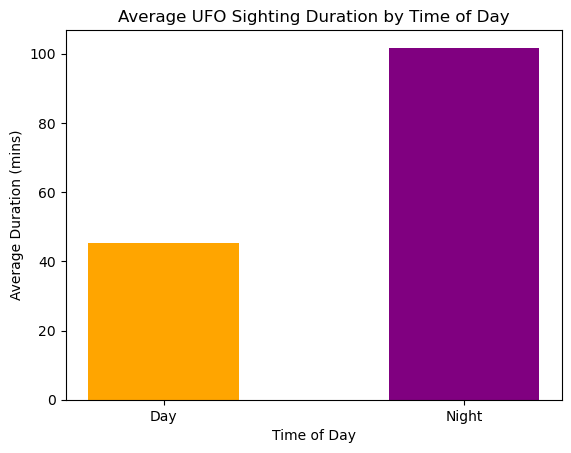

In [91]:
plt.bar(avg_duration['time_of_day'], avg_duration['duration (mins)'], width=0.5, color=['orange', 'purple'])
plt.title('Average UFO Sighting Duration by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Duration (mins)')
plt.show()

In [93]:
#Does the time of day affect the duration of UFO sightings?

In [95]:
avg_duration

time_of_day  duration (mins)
0         Day        45.310419
1       Night       101.733269

In [97]:
US_df[['hour','shape']].value_counts()

shape = US_df.groupby('hour')['shape'].value_counts()
shape_df = shape.reset_index()
shape_df

hour     shape  count
0     0.0     light    643
1     0.0  triangle    358
2     0.0    circle    343
3     0.0   unknown    238
4     0.0  fireball    227
..    ...       ...    ...
511  23.0       egg     47
512  23.0     cross     17
513  23.0      cone     14
514  23.0     delta      1
515  23.0     round      1

[516 rows x 3 columns]

In [99]:
agg_data = shape_df.groupby('hour')['count'].sum().reset_index()
agg_data

hour  count
0    0.0   3066
1    1.0   2453
2    2.0   1746
3    3.0   1513
4    4.0   1175
5    5.0   1313
6    6.0    972
7    7.0    708
8    8.0    649
9    9.0    792
10  10.0    941
11  11.0    897
12  12.0   1051
13  13.0   1011
14  14.0   1004
15  15.0   1119
16  16.0   1272
17  17.0   2073
18  18.0   3252
19  19.0   4977
20  20.0   7109
21  21.0   9432
22  22.0   8616
23  23.0   5958

Slope: 235.32304347826084
Intercept: -77.08999999999969
R-squared: 0.4055464852557293
P-value: 0.0008194449339913304


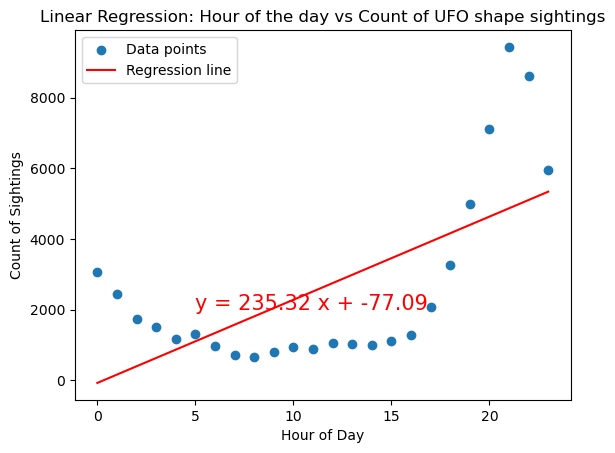

In [101]:
# Aggregate counts by hour
agg_data = shape_df.groupby('hour')['count'].sum().reset_index()
x = agg_data['hour']
y = agg_data['count']
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(agg_data['hour'], agg_data['count'])

# Print results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

# To visualize 

line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(agg_data['hour'], agg_data['count'], label='Data points')
plt.plot(agg_data['hour'], slope * agg_data['hour'] + intercept, color='red', label='Regression line')

plt.annotate(line_eq,(5,2000),fontsize=15,color="red")
plt.xlabel('Hour of Day')
plt.ylabel('Count of Sightings')
plt.title('Linear Regression: Hour of the day vs Count of UFO shape sightings')
plt.legend()
plt.show()

**SUMMARY**

**R Squared Value:**
- the R squared value is 0.405. This implies 40.5% of variation in UFO shape sightings can be explained by the hour of the day.
- This also indicates that while there is a relatoinship between hour of the day and sightings, other factors could also contribute to the UFO sightings.

**p-value:**
- p-value of 0.00082 indicates a statistically significant relationship between the dependent and independent variable.

**Linear Regression Equation:**
- There is a significant positive correlation between the hour of the day and UFO shape sightings, suggesting that sightings increase as the day progresses.
- However, the model explains only a portion of the variance, indicating that other factors may also influence sighting counts.